import numpy as np
import random

random_bools = [random.choice([True, False]) for _ in range(4)]

defining_columns =  4
defining_rows = 4
defining_matrix = np.ones((defining_rows, defining_columns))

quadrant_columns = quarter_size
quadrant_rows = quarter_size
quadrant_matrix = np.zeros((quadrant_rows, quadrant_columns))

for _ in range(2):
    quadrant_matrix[0,_]=random_bools[_]

for _ in range(2):
    quadrant_matrix[_,0]=random_bools[2+_]



In [21]:
import numpy as np
input_size = 8
# check if input size is even
if input_size % 2 != 0:
    raise ValueError("input size is not even")

input_matrix = np.random.randint(8, size=(input_size, input_size))
# please check if input_matrix is greather than 1 than set to 0
for delta_x in range(input_size):
    for delta_y in range(input_size):
        if input_matrix[delta_x,delta_y] > 1:
            input_matrix[delta_x,delta_y] = 0

output_size = input_size//2
output_matrix = np.zeros((output_size, output_size))

for quarter_x in range(output_size):
    for quarter_y in range(output_size):
        quandrant_matrix = []
        for delta_x in range(2):
            for delta_y in range(2):
                quandrant_matrix.append(input_matrix[quarter_x*2+delta_x,quarter_y*2+delta_y])
        # find out if any value in matrix is one
        if any(quandrant_matrix):
            output_matrix[quarter_x,quarter_y] = 1
        else:
            output_matrix[quarter_x,quarter_y] = 0
            
print(input_matrix)
print(output_matrix)



[[0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0]]
[[0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


 Input Matrix:
 [[0 0 1 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 1 0]
 [0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]

Output Matrix:
 [[1. 1. 1.]
 [0. 1. 1.]
 [1. 0. 0.]]



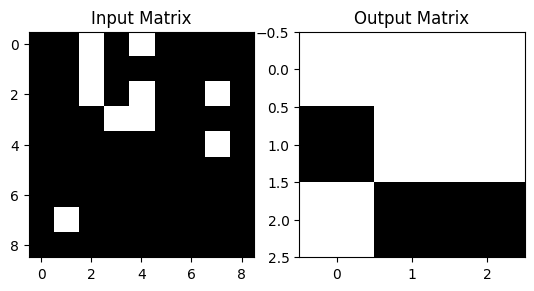

In [31]:
import numpy as np
import matplotlib.pyplot as plt
input_size = 9
block_size = 3
# check if input size is even
if input_size % block_size != 0:
    raise ValueError(f"Input size is not dividable by quarter size {block_size}.")

input_matrix = np.random.randint(8, size=(input_size, input_size))
# please check if input_matrix is greather than 1 than set to 0
for delta_x in range(input_size):
    for delta_y in range(input_size):
        if input_matrix[delta_x,delta_y] > 1:
            input_matrix[delta_x,delta_y] = 0

output_size = input_size//block_size
output_matrix = np.zeros((output_size, output_size))

for quarter_x in range(output_size):
    for quarter_y in range(output_size):
        quandrant_matrix = []
        for delta_x in range(block_size):
            for delta_y in range(block_size):
                quandrant_matrix.append(input_matrix[quarter_x*block_size+delta_x,quarter_y*block_size+delta_y])
        # find out if any value in matrix is one
        if any(quandrant_matrix):
            output_matrix[quarter_x,quarter_y] = 1
        else:
            output_matrix[quarter_x,quarter_y] = 0
            
print(f" Input Matrix:\n {input_matrix}\n")
print(f"Output Matrix:\n {output_matrix}\n")

# Display the matrices as images
plt.subplot(1, 2, 1)
plt.imshow(input_matrix, cmap='gray')
plt.title('Input Matrix')

plt.subplot(1, 2, 2)
plt.imshow(output_matrix, cmap='gray')
plt.title('Output Matrix')

plt.show()

In [36]:
class SimpleNeuralNetwork:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.random.randn(input_size, 1)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, inputs):
        return self.sigmoid(np.dot(inputs, self.weights) + self.bias)

    def backward(self, inputs, actual_output, predicted_output):
        error = actual_output - predicted_output
        d_predicted_output = error * self.sigmoid_derivative(predicted_output)
        # Optimize weight update for batch processing
        self.weights += np.dot(inputs.T, d_predicted_output) * self.learning_rate
        self.bias += np.sum(d_predicted_output) * self.learning_rate

    def train(self, inputs, outputs, iterations):
        for _ in range(iterations):
            predicted_output = self.forward(inputs)
            self.backward(inputs, outputs, predicted_output)



In [51]:
# Example usage
# Generate training data
input_data = np.random.randint(0, 2, (10000, 4))
output_data = (np.sum(input_data, axis=1, keepdims=True) > 0).astype(int)

# Initialize the neural network

# Vary the iterations
iterations_list = [10,20,30,40,50,70,100,150,250,500]

# Train and test the neural network for each iteration
for iterations in iterations_list:
    # Train the neural network
    nn = SimpleNeuralNetwork(input_size=4)
    nn.train(input_data, output_data, iterations=iterations)

    # Print the weights of the neural network
    # Calculate the average of the weights and print itl
    print(f"Average Weight for {iterations} iterations: {np.mean(nn.weights)}")



Average Weight for 10 iterations: 40.093001977599094
Average Weight for 20 iterations: 50.53727214709074
Average Weight for 30 iterations: 61.53051531177556
Average Weight for 40 iterations: 52.37544507358875
Average Weight for 50 iterations: 41.97306172119323
Average Weight for 70 iterations: 60.172875758480515
Average Weight for 100 iterations: 40.80722550431505
Average Weight for 150 iterations: 45.166370747632484
Average Weight for 250 iterations: 32.3035043039562
Average Weight for 500 iterations: 39.32532401880758
